In [ ]:
import pandas as pd
df_raw_tripadvisor = pd.read_excel(open('data/property-tripadvisor-reviews.xlsx', 'rb'), sheet_name='Data') 

In [ ]:
# convert date to year month
df_raw_tripadvisor['publishedDate'] = pd.to_datetime(df_raw_tripadvisor['publishedDate'])
df_raw_tripadvisor['publishedDate'] = df_raw_tripadvisor['publishedDate'].dt.strftime('%Y-%m')

In [ ]:
# Group by publishedDate by calculating average rating and combining all the text
df_raw_tripadvisor_result = df_raw_tripadvisor.groupby('publishedDate').agg({
    'rating': 'mean',
    'text': ' '.join
}).reset_index()

# Rename columns
df_raw_tripadvisor_result = df_raw_tripadvisor_result.rename(columns={'rating': 'average_rating', 'text': 'combined_text'})

In [7]:
df_raw_tourism = pd.read_excel(open('data/tourism-data.xlsx', 'rb'), sheet_name='Data') 

In [8]:
# convert date to year month
df_raw_tourism['Month'] = pd.to_datetime(df_raw_tourism['Month'])
df_raw_tourism['Month'] = df_raw_tourism['Month'].dt.strftime('%Y-%m')

In [9]:
df_raw_tourism_result = df_raw_tourism.groupby('Month').agg({
    'Total tourist arrivals': 'sum'
}).reset_index()

In [10]:
# Merge datasets based on the common key
df_merged = pd.merge(df_raw_tripadvisor_result, df_raw_tourism_result, left_on="publishedDate", right_on="Month")
df_merged.head()

,publishedDate,average_rating,combined_text,Month,Total tourist arrivals
0,2008-02,3.0,We got to Male in the evening and had to stay ...,2008-02,67963
1,2008-03,2.0,The Conrad put us here b/c we got in late on S...,2008-03,71623
2,2009-02,3.0,I stayed here for one night whilst on business...,2009-02,58520
3,2009-06,3.0,We had been booked to he hotel by the Conrad. ...,2009-06,36205
4,2009-10,3.0,"This hotel was ok, perfect for a transit hotel...",2009-10,62432


In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [13]:
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Add a new column with sentiment polarity
df_merged['sentiment_polarity'] = df_merged['combined_text'].apply(calculate_polarity)
df_merged.head()

,publishedDate,average_rating,combined_text,Month,Total tourist arrivals,sentiment_polarity
0,2008-02,3.0,We got to Male in the evening and had to stay ...,2008-02,67963,0.120250
1,2008-03,2.0,The Conrad put us here b/c we got in late on S...,2008-03,71623,0.038915
2,2009-02,3.0,I stayed here for one night whilst on business...,2009-02,58520,0.311389
3,2009-06,3.0,We had been booked to he hotel by the Conrad. ...,2009-06,36205,0.250000
4,2009-10,3.0,"This hotel was ok, perfect for a transit hotel...",2009-10,62432,0.194298


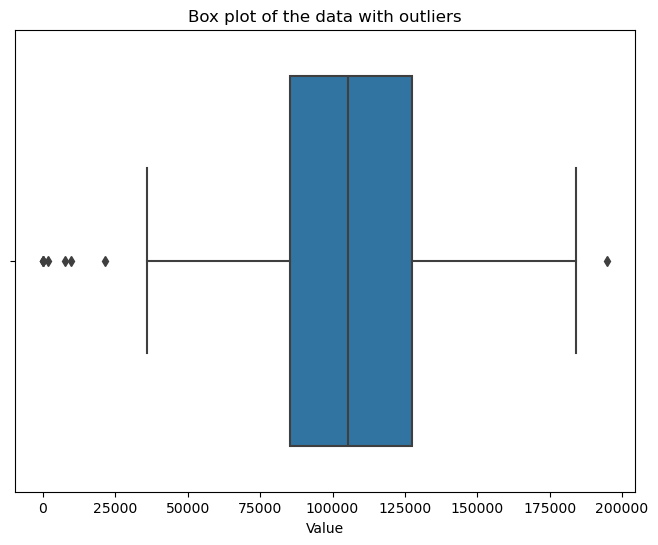

In [47]:
import seaborn as sns
#visualize outliers using scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_merged['Total tourist arrivals'])
plt.title('Box plot of the data with outliers')
plt.xlabel('Value')
plt.show()

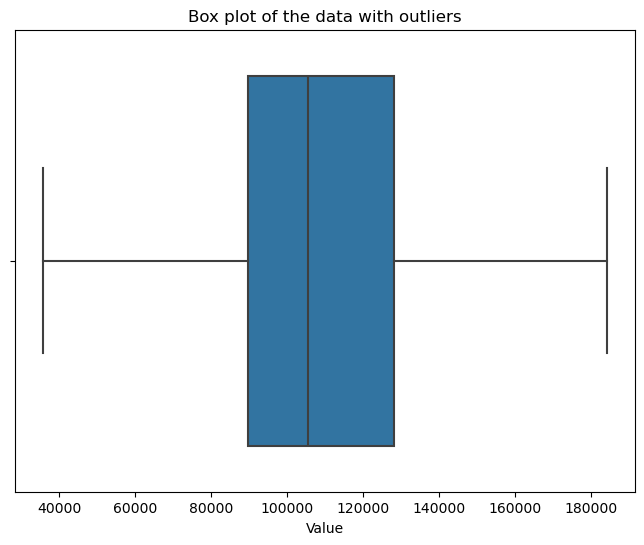

In [48]:
import numpy as np

def remove_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Detect and remove outliers using IQR
df_cleaned_iqr = remove_outliers_iqr(df_merged, 'Total tourist arrivals')

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned_iqr['Total tourist arrivals'])
plt.title('Box plot of the data with outliers')
plt.xlabel('Value')
plt.show()

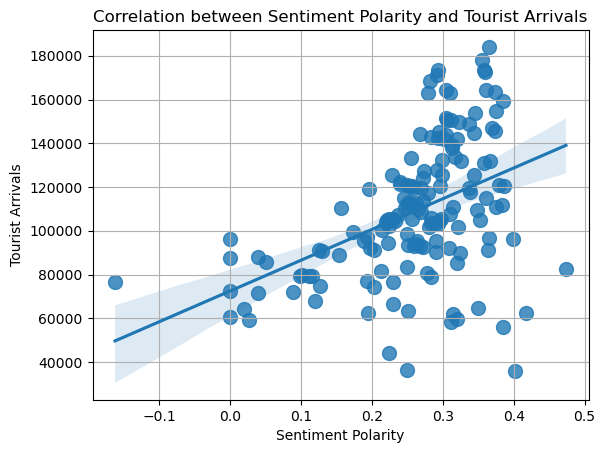

In [54]:


# Plotting
sns.regplot(x='sentiment_polarity', y='Total tourist arrivals', data=df_cleaned_iqr, scatter_kws={'s': 100})
plt.title('Correlation between Sentiment Polarity and Tourist Arrivals')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Tourist Arrivals')
plt.grid(True)
plt.show()

In [58]:
import pandas as pd

# Sample DataFrame of TripAdvisor reviews
reviews_data = {
    'Review_ID': [1, 2, 3, 4, 5],
    'Review_Text': [
        "The hotel accommodation was excellent.",
        "We enjoyed visiting the local attractions.",
        "The food at the restaurant was delicious.",
        "The service provided was top-notch.",
        "Great experience overall."
    ]
}
df_reviews = pd.DataFrame(reviews_data)

# Define keywords for each domain
domain_keywords = {
    'Accommodation': ['hotel', 'accommodation', 'lodging'],
    'Attractions': ['attractions', 'sights', 'tourist spots'],
    'Food': ['food', 'restaurant', 'cuisine'],
    'Services': ['service', 'customer service', 'hospitality']
}

# Function to assign category based on keywords
def assign_category(text):
    for category, keywords in domain_keywords.items():
        if any(word in text.lower() for word in keywords):
            return category
    return 'Other'

# Create new column "text_category" and assign identified category
df_reviews['text_category'] = df_reviews['Review_Text'].apply(assign_category)

# Display the categorized reviews
print("Categorized Reviews:")
print(df_reviews)


Categorized Reviews:
   Review_ID                                 Review_Text  text_category
0          1      The hotel accommodation was excellent.  Accommodation
1          2  We enjoyed visiting the local attractions.    Attractions
2          3   The food at the restaurant was delicious.           Food
3          4         The service provided was top-notch.       Services
4          5                   Great experience overall.          Other


In [62]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sample text
text = "I hate this product! It's very bad."

# Perform sentiment analysis
scores = sid.polarity_scores(text)

# Print the sentiment scores
print("Sentiment Scores:", scores)

# Extract the sentiment polarity score
sentiment_score = scores['compound']
print("Sentiment Polarity Score:", sentiment_score)

Sentiment Scores: {'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'compound': -0.831}
Sentiment Polarity Score: -0.831
